[{'box': (252, 233, 128, 128), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.03, 'sad': 0.01, 'surprise': 0.0, 'neutral': 0.94}}]
neutral 0.94
[['angry', 0], ['disgust', 0], ['fear', 1], ['happy', 3], ['sad', 1], ['surprise', 0], ['neutral', 94]]
happy 3
[{'box': (258, 231, 134, 134), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.23, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.75}}]
neutral 0.75
[['angry', 0], ['disgust', 0], ['fear', 1], ['happy', 23], ['sad', 0], ['surprise', 0], ['neutral', 75]]
happy 23
[{'box': (211, 209, 175, 175), 'emotions': {'angry': 0.02, 'disgust': 0.0, 'fear': 0.03, 'happy': 0.01, 'sad': 0.01, 'surprise': 0.01, 'neutral': 0.91}}]
neutral 0.91
[['angry', 2], ['disgust', 0], ['fear', 3], ['happy', 1], ['sad', 1], ['surprise', 1], ['neutral', 91]]
fear 3
[{'box': (213, 216, 171, 171), 'emotions': {'angry': 0.15, 'disgust': 0.0, 'fear': 0.05, 'happy': 0.0, 'sad': 0.03, 'surprise': 0.05, 'neutral': 0.71}}]
neutral 0.71
[

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Vetri\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Vetri\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "<ipython-input-2-7c10762a9398>", line 157, in check_event
    if event.type == MUSIC_END:
NameError: name 'MUSIC_END' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Vetri\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Vetri\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "<ipython-input-2-7c10762a9398>", line 157, in check_event
    if event.type == MUSIC_END:
NameError: name 'MUSIC_END' is not defined


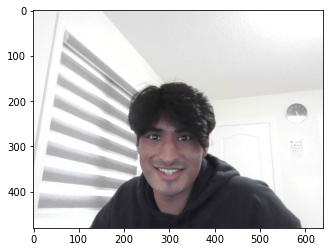

In [2]:
#TO
"""
Features:
Facial Recognition
Skip (if it is the same emotion, it will play the same thing)
One track per emotion
Can go back to previous song
Pause/Play
Background change error - Works sometimes (Fix or remove)
"""
from tkinter import *
import pygame
import random
import time

#creating and naming window
window = Tk()
window.title("First Window")
#Changing background colour
#window.configure(background="black")

#Changing window size
width, height = window.winfo_screenwidth(), window.winfo_screenheight()
window.geometry('%dx%d+0+0' % (width,height))

#Background
bg = PhotoImage(file = "Sad_Background.gif")
label1 = Label( window, image = bg)
label1.place(x = 0, y = 0)
label1.lower()
bg_order = 0

#Title
name="Not Playing"
Label (window,text=name, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)

pygame.init()


lastmood = ""
skip = "n"
currentmood = ""
def tester():
    #Taking picture
    import cv2
    
    # initialize the camera
    cam = cv2.VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    if s:    # frame captured without any errors
        # cv2.namedWindow("cam-test",cv2.CV_WINDOW_AUTOSIZE())
        cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
        cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
        cv2.waitKey(0)
        cv2.imwrite("emotion.jpg",img) #save image
        
        #Photo emotion recognition
    import tensorflow
    from fer import FER
    import matplotlib.pyplot as plt 
    %matplotlib inline

    temp_pic = plt.imread("emotion.jpg")
    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(temp_pic)
    # Print all captured emotions with the image
    print(captured_emotions)
    plt.imshow(temp_pic)

    # Use the top Emotion() function to call for the dominant emotion in the image
    dominant_emotion, emotion_score = emo_detector.top_emotion(temp_pic)
    
    #Converting the info into a list
    result = (emo_detector.detect_emotions(temp_pic))
    emo_list = (str(result[0]["emotions"]).strip("[]{ }").split(","))
    split_emo_list = []
    for i in range (len(emo_list)):
        split_emo_list.append(emo_list[i].strip(" ").split(": "))
        split_emo_list[i][0] = split_emo_list[i][0].strip("'' ")
        split_emo_list[i][1] = int(float (split_emo_list[i][1])*100)
    print (split_emo_list)
    #ordering the list
    for i in range(len(split_emo_list)-1):
        current_number = split_emo_list[i+1][1]
        
        while i >= 0 and current_number > split_emo_list[i][1]:
            x = split_emo_list[i + 1]
            split_emo_list[i + 1] = split_emo_list[i]
            split_emo_list[i] = x
            i -= 1
    dominant_emotion = split_emo_list[0][0]
    second_emotion = split_emo_list[1][0]
    
    print(dominant_emotion, split_emo_list[0][1])
    print(second_emotion, split_emo_list[1][1])
    
    global lastmood
    #Determining the mood and assigning a file
    global currentmood
    if currentmood==dominant_emotion:
        currentmood = second_emotion
        filename = "%s.mp3" %second_emotion
    else:
        currentmood=dominant_emotion
        filename = "%s.mp3" %dominant_emotion
    #For automatic next song
    a = pygame.mixer.Sound(filename)
    #Getting the length of the song and converting it to milliseconds (and adding an extra second)
    length = int(a.get_length()*1000)+1
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()
    name="Playing"
    Label (window,text=name, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
    MUSIC_END = pygame.USEREVENT+1
    SONG_END = pygame.USEREVENT
    pygame.mixer.music.set_endevent(MUSIC_END)
    #Changes track after song is done
    window.after(length, check_event)
    #We can also make it change tracks every few minutes (but we need to ensure that the music flows)
    


soundplay = 0
music = "PAUSE"
def playsound():
    global soundplay
    soundplay+=1
    if (soundplay==1):
        Button (window, image=pause, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
        tester()
    elif (soundplay%2==0):
        pygame.mixer.music.pause()
        Button (window, image=play, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
    else:
        pygame.mixer.music.unpause()  
        Button (window, image=pause, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
    #Song Length
    play_time()
def play_next():
    pygame.mixer.music.fadeout
    global lastmood
    try:
        lastmood=currentmood
    except:
        pass
    tester()
def go_back():
    pygame.mixer.music.fadeout
    filename = "%s.mp3" %lastmood
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()    

def close_window():
    window.destroy()
    pygame.mixer.music.stop()
    
def check_event():
    for event in pygame.event.get():
        if event.type == MUSIC_END:
            name="Done"
            Label (window,text=name, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
            play_next()
def play_time():
    current_time = pygame.mixer.music.get_pos()
    name="Playing"
    Label (window,text=current_time, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
    
    
#Use this for skipping - pygame.mixer.music.fadeout
back = PhotoImage(file="Back")
Button (window, image=back, command=go_back, bg="black", bd=0).place(relx=0.35, rely=0.5, anchor=CENTER)

play = PhotoImage(file="Play")
pause = PhotoImage(file="Pause")
    
Button (window, image=play, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
next = PhotoImage(file="Next")
Button (window, image=next, command=play_next, bg="black", bd=0).place(relx=0.65, rely=0.5, anchor=CENTER)

exit = PhotoImage(file="exit1.gif")
Button (window, image=exit, command=close_window).place(relx=0.98, rely=0, anchor=N)




#running the main window
window.mainloop()

#Next Steps


#Change background according to the mood (needs to be cool not just changing the colour)
#Find smaller tracks or tracks that can flow well when changed (and use that to sense emotions every few minutes)
#Create a playlist for each emotion and find a way to switch them out at random and not repeat
#Create a chrome extension using code
#Create volume settings
#Assess user's resting face and modify emotion detection accordingly (eg. if they are happy resting face people, 
#we can subtract 0.25 from the happy section and add it to neutral each time we assess them)

[{'box': (194, 129, 146, 146), 'emotions': {'angry': 0.04, 'disgust': 0.0, 'fear': 0.02, 'happy': 0.0, 'sad': 0.0, 'surprise': 0.02, 'neutral': 0.91}}]
neutral 0.91
[['angry', 4], ['disgust', 0], ['fear', 2], ['happy', 0], ['sad', 0], ['surprise', 2], ['neutral', 91]]


[['neutral', 91],
 ['angry', 4],
 ['fear', 2],
 ['surprise', 2],
 ['disgust', 0],
 ['happy', 0],
 ['sad', 0]]

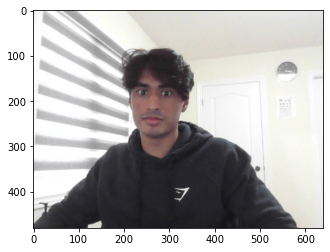

In [22]:
import tensorflow
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

temp_pic = plt.imread("emotion.jpg")
emo_detector = FER(mtcnn=True)
# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(temp_pic)
# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(temp_pic)

# Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = emo_detector.top_emotion(temp_pic)
print(dominant_emotion, emotion_score)

#Creating list of emotions
def emo_sort():
    #Converting the info into a list
    result = (emo_detector.detect_emotions(temp_pic))
    emo_list = (str(result[0]["emotions"]).strip("[]{ }").split(","))
    split_emo_list = []
    for i in range (len(emo_list)):
        split_emo_list.append(emo_list[i].strip(" ").split(": "))
        split_emo_list[i][0] = split_emo_list[i][0].strip("'' ")
        split_emo_list[i][1] = int(float (split_emo_list[i][1])*100)
    print (split_emo_list)
    #ordering the list
    for i in range(len(split_emo_list)-1):
        current_number = split_emo_list[i+1][1]
        
        while i >= 0 and current_number > split_emo_list[i][1]:
            x = split_emo_list[i + 1]
            split_emo_list[i + 1] = split_emo_list[i]
            split_emo_list[i] = x
            i -= 1
    return (split_emo_list)
emo_sort()

In [ ]:
def sortNumbers(toSort):
    for i in range(len(toSort)-1):
        current_number = toSort[i+1][1]
        
        while i >= 0 and current_number > toSort[i][1]:
            x = toSort[i + 1]
            toSort[i + 1] = toSort[i]
            toSort[i] = x
            i -= 1
        print (toSort)

sortNumbers ([["'angry'", 8], [" 'disgust'", 0], [" 'fear'", 7], [" 'happy'", 0], [" 'sad'", 2], [" 'surprise'", 12], [" 'neutral'", 71]])

In [ ]:
def sortNumbers(toSort):
    for number in range(1, len(toSort)):
        current_number = toSort[number]
        i = number - 1

        while i >= 0 and current_number < toSort[i]:
            toSort[i + 1] = toSort[i]
            i -= 1

        toSort[i + 1] = current_number
        print (toSort)
sortNumbers([8,0,7,0,2,12,71])